---
# Préparation des données

---

Pour préparer adéquatement les données avant de les fournir à un ou plusieurs algorithmes d'apprentissage automatique, il faut également s'assurer de la bonne représentation de ces données pour ne pas leur fournir de biais trop difficiles à manipuler.

<center><img src="./img/mlprocess_2.png" alt="Processus d'apprentissage automatique" width="50%"/></center>

1. Le nettoyage et les aberrations statistiques
2. L'imputation de données manquantes
3. **Équilibrage des données déséquilibrées**
4. Transformation des caractéristiques
    1. *rescaling* et *normalizing* (\[0, 1\] ou \[-1, 1\]), *standardizing* (loi normale)
    2. Représentation matricielle de données catégorisées
    3. Réduction de la dimensionnalité ou création de caractéristiques


## 3. Données d'entraînement déséquilibrées

### Paradoxe de l'exactitude

Le [paradoxe de l'exactitude](https://en.wikipedia.org/wiki/Accuracy_paradox) est le nom de la situation où vos mesures d'exactitude indiquent que vous avez une excellente exactitude (telle que 90%), mais que l'exactitude ne reflète que la distribution de classe majoritaire sous-jacente.

C'est un problème très courant, car l'exactitude est souvent la première mesure utilisée (par `Scikit-Learn`) pour évaluer nos modèles dans les problèmes de classification.

### Mettez tout sur le rouge!

Que se passe-t-il dans les modèles lorsque l'entraînement est fait sur un jeu de données déséquilibré? 

Si une exactitude de 90% est obtenue sur des données déséquilibrées (avec 90% des instances dans la classe 1), c'est parce que les modèles examinent les données et décident intelligemment que la meilleure chose à faire est de toujours prédire "Classe 1" pour atteindre une grande exactitude.

Cela se voit mieux lorsqu’un algorithme basé sur des règles simples est utilisé. En regardant la règle dans le modèle final, on constate qu'il est très probable qu'une seule classe est prédite, quelles que soient les données à prédire.

Comment régler ce problème ?

#### Collecter plus de données

Vous pensez peut-être que c'est idiot, mais la collecte de plus de données est presque toujours négligée.

Pouvez-vous collecter plus de données? Prenez une seconde et demandez-vous si vous êtes capable de collecter plus de données sur votre problème.

Un ensemble de données plus volumineux pourrait exposer une perspective différente et peut-être plus équilibrée des classes.

D'autres exemples de classes mineures peuvent être utiles ultérieurement lorsque nous examinons le rééchantillonnage de votre jeu de données.

#### Changer de métrique de performance

L'exactitude n'est pas la métrique à utiliser lorsque vous travaillez avec un jeu de données déséquilibré. Nous avons vu que c'est trompeur.

Certains indicateurs ont été conçus pour vous raconter une histoire plus véridique lorsque vous travaillez avec des classes déséquilibrées.

Vous verrez plus en détail au prochain bloc les différentes mesures de performance:
- Matrice de confusion: décomposition des prédictions dans un tableau montrant les prédictions correctes (la diagonale) et les types de prédictions incorrectes effectuées (quelles classes de prédictions incorrectes ont été attribuées).
- Exactitude: Mesure de l'exactitude d'un classificateur.
- Rappel : Une mesure de la complétude d'un classificateur
- Score F1 (ou F-score): moyenne pondérée de la précision et du rappel.
- Kappa (ou [kappa de Cohen](https://en.wikipedia.org/wiki/Cohen%27s_kappa)): précision de la classification normalisée par le déséquilibre des classes dans les données.
- Courbes ROC: À l'instar de la précision et du rappel, l'exactitude est divisée en sensibilité et spécificité et des modèles peuvent être choisis en fonction des seuils d'équilibre de ces valeurs.

Tout cela sera vu au prochain bloc sur l'évaluation de modèles.

#### Ré-échantillonner le jeu de données

Il est possible de modifier le jeu de données utilisé afin d'obtenir des données plus équilibrées et améliorer le modèle prédictif.

Cette modification s'appelle [échantillonnage du dataset](https://en.wikipedia.org/wiki/Oversampling_and_undersampling_in_data_analysis). Il existe deux méthodes principales pour uniformiser les classes:
- l'ajout de copies d'instances de la classe sous-représentée : suréchantillonnage (ou plus formellement échantillonner avec remplacement), ou
- la suppression d'instances de la classe surreprésentée : sous-échantillonnage.

Ces approches sont souvent très faciles à mettre en œuvre et rapides à exécuter. Elles sont un excellent point de départ.

En fait, il vaut mieux toujours essayer les deux approches sur tous les jeux de données déséquilibrés, juste pour voir si cela donne une amélioration de vos mesures préférées.

Quelques règles de base :
- Le sous-échantillonnage est préférable lorsque vous avez beaucoup de données (des dizaines, des centaines de milliers d'instances ou plus).
- Le suréchantillonnage est préférable lorsque vous n’avez pas beaucoup de données (des dizaines de milliers d’enregistrements ou moins).
- Tester des schémas d'échantillonnage aléatoire et non aléatoire (par exemple stratifié).
- Tester différents ratios de rééchantillonnage (il n'est pas toujours nécessaire d'avoir un ratio de 1:1 dans un problème de classification binaire).

#### Générer des échantillons synthétiques

Un moyen simple de générer des échantillons synthétiques consiste à échantillonner de manière aléatoire les attributs d'instances de la classe minoritaire.

Il est possible de les échantillonner de manière empirique dans votre jeu de données ou d'utiliser une méthode telle que Naive Bayes, qui permet d'échantillonner chaque attribut indépendamment lorsqu'il est exécuté à l'envers. Plus de données différentes seront générées, mais les relations non linéaires entre les attributs peuvent ne pas être préservées.

Il existe des algorithmes systématiques utilisables pour générer des échantillons synthétiques. Le plus populaire de ces algorithmes est appelé SMOTE ou technique de suréchantillonnage minoritaire synthétique.

SMOTE est une méthode de suréchantillonnage. Elle fonctionne en créant des échantillons synthétiques de la classe mineure au lieu de créer des copies. L'algorithme sélectionne deux instances similaires ou plus (à l'aide d'une mesure de distance) et perturbe une instance à la fois d'une quantité aléatoire dans la différence des instances voisines.

Il existe plusieurs implémentations de l'algorithme SMOTE. En Python, le module "[`imbalanced-learn`](https://github.com/fmfn/UnbalancedDataset)" fournit un certain nombre d'implémentations de SMOTE ainsi que diverses autres techniques de ré-échantillonnage.

#### Essayer les modèles pénalisés

Utilisation des mêmes algorithmes en leur donnant une perspective différente du problème.

La classification pénalisée impose un coût supplémentaire au modèle pour faire des erreurs de classification à la classe minoritaire pendant l'entraînement. Ces pénalités peuvent inciter le modèle à accorder plus d’attention à la classe minoritaire.

Souvent, le traitement des pénalités de classe ou de poids est effectué dans l’algorithme d’apprentissage. Il existe également des versions pénalisées d'algorithmes de classification tels que les SVMs ou LDAs.

Il est aussi possible d'avoir des cadres génériques pour les modèles pénalisés. Par exemple, Weka a un classificateur CostSensitive qui peut assigner à tout classificateur une matrice de pénalités personnalisée pour la classification des échecs.

L’utilisation de la pénalisation est souhaitable si vous êtes restreints à un algorithme spécifique et êtes incapables de rééchantillonner ou si vous obtenez des résultats médiocres. Il fournit un autre moyen d’équilibrer les cours. La mise en place de la matrice de pénalités peut être complexe. Vous devrez très probablement essayer divers systèmes de pénalités afin de trouver celui qui convient le mieux à votre problème.

#### Essayer une perspective différente

Il existe des domaines d'étude dédiés aux jeux de données déséquilibrés. Ils ont leurs propres algorithmes, mesures et terminologie.

Jeter un coup d'œil et réfléchir à votre problème sous ces angles peut parfois faire honte à certaines idées.

La détection des anomalies et la détection des modifications sont deux éléments qui pourraient vous intéresser.

La détection d'anomalie est la détection d'événements rares. Il s’agit peut-être d’un dysfonctionnement de la machine signalé par ses vibrations ou d’une activité malveillante d’un programme indiqué par sa séquence d’appels système. Les événements sont rares et comparés au fonctionnement normal.

Ce changement de mentalité considère la classe mineure comme la classe des valeurs aberrantes, ce qui peut vous aider à réfléchir à de nouvelles façons de séparer et de classer les échantillons.

La détection de changement est similaire à la détection d'anomalie, sauf que plutôt que de rechercher une anomalie, elle recherche un changement ou une différence. Il peut s’agir d’un changement de comportement d’un utilisateur, tel qu’observé par les modèles d’utilisation ou les transactions bancaires.

Ces deux évolutions adoptent une approche plus en temps réel du problème de classification. Ça pourrait changer la façon dont vous abordez le problème et peut-être même suggérer d’autres techniques à essayer.


### Exemple de données déséquilibrées

* Jeu de données déséquilibré
* Le piège métrique
* Matrice de confusion
* Rééchantillonnage
* Sous-échantillonnage aléatoire
* Sur-échantillonnage aléatoire
* Module d'apprentissage en Python déséquilibré
* Sous-échantillonnage aléatoire et suréchantillonnage avec apprentissage déséquilibré
* Sous-échantillonnage: liens Tomek
* Sous-échantillonnage: Centroids de cluster
* Sur-échantillonnage: SMOTE
* Sur-échantillonnage suivi d'un sous-échantillonnage
* Plus de liens


#### Données déséquilibrées

Dans cette partie, nous passons en revue certaines techniques permettant de gérer des ensembles de données très déséquilibrés, en mettant l’accent sur le ré-échantillonnage. 


Class 0: 99000
Class 1: 1000
Proportion: 99.0 : 1


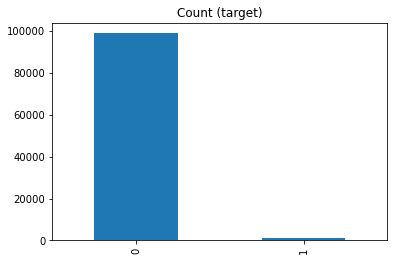

In [1]:
import numpy as np
import pandas as pd

from sklearn.datasets import make_classification

major = 0.99

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[major, 1-major],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100000, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
target_count = df.target.value_counts()
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Proportion:', round(target_count[0] / target_count[1], 4), ': 1')
df.target.value_counts().plot(kind='bar', title='Count (target)');

#### Le piège des métriques

L'un des principaux problèmes auxquels se heurtent les utilisateurs novices lorsqu'ils traitent des jeux de données déséquilibrés est lié aux métriques utilisées pour évaluer leur modèle. Utiliser des métriques plus simples comme l'exactitude (`accuracy`) peut être trompeur. Dans un ensemble de données avec des classes très déséquilibrées, si le classificateur "prédit" toujours la classe la plus courante sans effectuer d'analyse des caractéristiques, il conservera un taux de précision élevé, évidemment illusoire.

Faisons cette expérience en utilisant une simple validation croisée et aucune ingénierie de caractéristiques:

In [2]:
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

model = XGBClassifier()
model = SVC(kernel='linear')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.4f%%" % (accuracy * 100.0))

Accuracy: 99.8150%


Exécutons maintenant le même code, mais en utilisant une seule caractéristique (ce qui devrait considérablement réduire l'exactitude du classificateur):

In [3]:
model = XGBClassifier()
model = SVC(kernel='linear')
model.fit(X_train[:,0:2], y_train)
y_pred = model.predict(X_test[:,0:2])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.4f%%" % (accuracy * 100.0))

Accuracy: 98.9950%


Comme nous pouvons le constater, le taux de précision élevé n’était qu’illusion. De cette manière, le choix de la métrique utilisée dans les jeux de données non équilibrés est extrêmement important. Un meilleur choix ici aurait été d'utiliser le [Coefficient de Gini normalisé](https://en.wikipedia.org/wiki/Gini_coefficient), une métrique plus robuste pour les jeux de données déséquilibrés, qui varie d'environ 0 pour une estimation aléatoire à environ 0,5 pour un score parfait.

#### Matrice de confusion

Une méthode intéressante pour évaluer les résultats consiste à utiliser une matrice de confusion qui montre les prédictions correctes et incorrectes pour chaque classe. Dans la première ligne, la première colonne indique combien de classes 0 ont été prédites correctement, et dans la seconde colonne, combien de classes 0 ont été prédites à 1. Dans la deuxième ligne, nous notons que toutes les entrées de classe 1 ont été prédites à tort comme étant la classe 0. Notez que la matrice de confusion n'est pas nécessairement symétrique comme l'est toujours la matrice de corrélation que l'on rencontre souvent en statistiques.

Par conséquent, plus les valeurs diagonales de la matrice de confusion sont élevées, mieux ce sera, ce qui indique de nombreuses prédictions correctes.

Matrice de confusion:
 [[19799     0]
 [  201     0]]


<ipython-input-4-745f074aad86>:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + labels)
<ipython-input-4-745f074aad86>:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels([''] + labels)


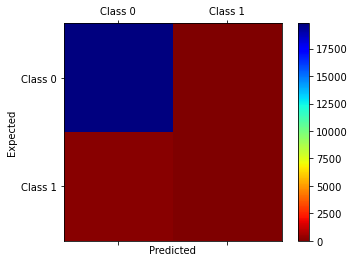

In [4]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Matrice de confusion:\n', conf_mat)

labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.jet_r)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

#### Rééchantillonage

Le rééchantillonnage est une technique largement adoptée pour traiter les jeux de données très déséquilibrés. Cela consiste à retirer des échantillons de la classe majoritaire (sous-échantillonnage) et/ou à ajouter d'autres exemples de la classe minoritaire (suréchantillonnage).


![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/resampling.png)

Malgré l'avantage de l'équilibrage des classes, ces techniques ont aussi leurs faiblesses (`No Free Lunch`). La mise en œuvre la plus simple du suréchantillonnage consiste à dupliquer aléatoirement des données de la classe minoritaire, ce qui peut entraîner un surapprentissage. Dans le sous-échantillonnage, la technique la plus simple consiste à supprimer aléatoirement des enregistrements de la classe majoritaire, ce qui entraîne nécessairement une perte d'information.

Implémentons un exemple de base, qui utilise la méthode `DataFrame.sample` pour obtenir aléatoirement des échantillons de chaque classe:

In [5]:
# Nombre de valeurs par classe
count_class_0, count_class_1 = df.target.value_counts()

# Séparation des classes
df_class_0 = df[df['target'] == 0]
df_class_1 = df[df['target'] == 1]

#### Sous-échantillonnage aléatoire

Sous-échantillonnage aléatoire:
1    1000
0    1000
Name: target, dtype: int64


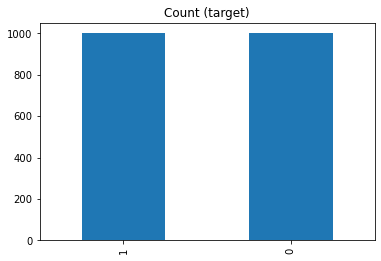

In [6]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Sous-échantillonnage aléatoire:')
print(df_test_under.target.value_counts())

df_test_under.target.value_counts().plot(kind='bar', title='Count (target)');

#### Suréchantillonnage aléatoire

Suréchantillonnage aléatoire:
1    99000
0    99000
Name: target, dtype: int64


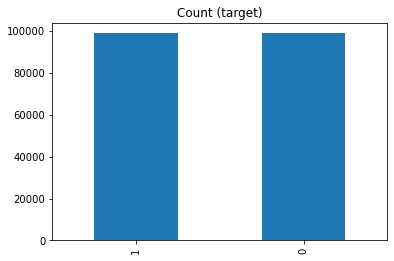

In [7]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Suréchantillonnage aléatoire:')
print(df_test_over.target.value_counts())

df_test_over.target.value_counts().plot(kind='bar', title='Count (target)');

#### Module d'apprentissage en Python déséquilibré

Un certain nombre de techniques de ré-échantillonnage plus sophistiquées ont été proposées dans la littérature scientifique.

Par exemple, il est possible de regrouper les données de la classe majoritaire et d'effectuer le sous-échantillonnage en supprimant les données de chaque cluster, cherchant ainsi à préserver les informations. En suréchantillonnage, au lieu de créer des copies exactes des données de la classe de minorité, nous pouvons introduire de petites variations dans ces copies, créant ainsi des échantillons synthétiques plus divers.

Appliquons certaines de ces techniques de ré-échantillonnage en utilisant la librairie Python [imbalanced-learn](http://contrib.scikit-learn.org/imbalanced-learn/stable/). Elle est compatible avec Scikit-Learn et fait partie des projets scikit-learn-contrib.


In [8]:
#!pip install imblearn
import imblearn

Pour faciliter la visualisation, créons un petit échantillon de données non équilibré à l'aide de la méthode `make_classification`:

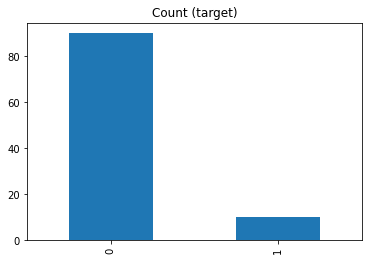

In [9]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_classes=2, class_sep=1.5, weights=[0.9, 0.1],
    n_informative=3, n_redundant=1, flip_y=0,
    n_features=20, n_clusters_per_class=1,
    n_samples=100, random_state=10
)

df = pd.DataFrame(X)
df['target'] = y
df.target.value_counts().plot(kind='bar', title='Count (target)');

Nous allons également créer une fonction de tracé à 2 dimensions, <code>plot_2d_space</code>, pour afficher la répartition des données:

In [10]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E']
    markers = ['o', 's']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            c=c, label=l, marker=m,alpha=.5
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

Étant donné que le jeu de données comporte de nombreuses dimensions (caractéristiques) et que nos graphiques seront en 2D, la taille du jeu de données est réduite au moyen de l'analyse en composantes principales (PCA):

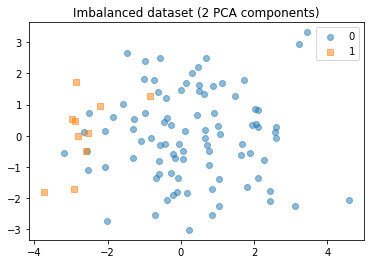

In [11]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X = pca.fit_transform(X)

plot_2d_space(X, y, 'Imbalanced dataset (2 PCA components)')

#### Sous-échantillonnage aléatoire et suréchantillonnage avec apprentissage déséquilibré

Indices retirés : [98  1 19 69 91 73 38 32 22 37  4  8  9 14 16 40 67 70 71 74]


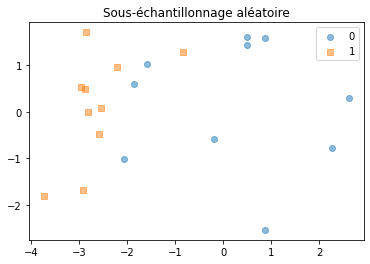

In [12]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_sample(X, y)
id_rus = rus.sample_indices_

print('Indices retirés :', id_rus)

plot_2d_space(X_rus, y_rus, 'Sous-échantillonnage aléatoire')

80 nouveaux points aléatoires


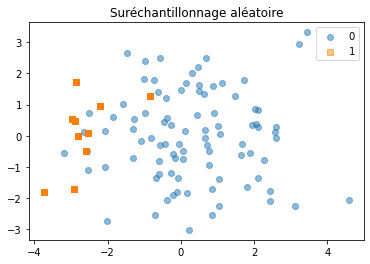

In [13]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_sample(X, y)

print(X_ros.shape[0] - X.shape[0], 'nouveaux points aléatoires')

plot_2d_space(X_ros, y_ros, 'Suréchantillonnage aléatoire')

#### Sous-échantillonnage: liens Tomek

Les liens Tomek sont des paires d'instances très proches, mais de classes opposées. La suppression des occurrences de la classe majoritaire de chaque paire augmente l'espace entre les deux classes, facilitant ainsi le processus de classification.

![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/tomek.png?v=2)

Dans le code ci-dessous, nous utiliserons `sampling_strategy = 'majority'` pour rééchantillonner la classe majoritaire.

Indices retirés: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73
 74 75 76 77 78 79 80 81 82 83 84 85 86 87 88 90 91 92 93 94 95 97 98 99]


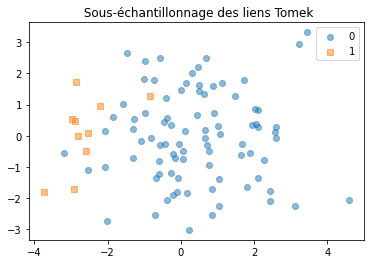

In [14]:
from imblearn.under_sampling import TomekLinks

tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_sample(X, y)
id_tl = tl.sample_indices_

print('Indices retirés:', id_tl)

plot_2d_space(X_tl, y_tl, ' Sous-échantillonnage des liens Tomek')

#### Sous-échantillonnage: Centroids de cluster

Cette technique effectue un sous-échantillonnage en générant des centroïdes basés sur des méthodes de clustering. Les données seront préalablement regroupées par similarité, afin de préserver les informations.

Dans cet exemple, le dictionnaire `{0: 10}` pour le paramètre `sampling_strategy`, indique de préserver 10 éléments de la classe majoritaire (0) et conserver toutes les données de la classe minoritaire (1).

In [1]:
from imblearn.under_sampling import ClusterCentroids

cc = ClusterCentroids(sampling_strategy={0: 10})
X_cc, y_cc = cc.fit_sample(X, y)

plot_2d_space(X_cc, y_cc, 'Cluster Centroids under-sampling')

ModuleNotFoundError: No module named 'imblearn'

#### Suréchantillonnage: SMOTE

SMOTE (Synthetic Minority Oversampling Technique) consiste à synthétiser des éléments pour la classe minoritaire, sur la base de ceux qui existent déjà. Cela fonctionne de manière aléatoire en sélectionnant un point de la classe minoritaire et en calculant les k-voisins les plus proches pour ce point (k-NN). Les points synthétiques sont ajoutés entre le point choisi et ses voisins.


 ![](https://raw.githubusercontent.com/rafjaa/machine_learning_fecib/master/src/static/img/smote.png)

Nous allons utiliser `sampling_strategy = 'minority'` pour rééchantillonner la classe minoritaire.

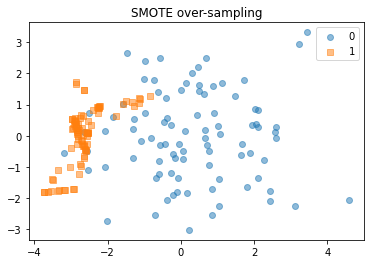

In [16]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_sample(X, y)

plot_2d_space(X_sm, y_sm, 'SMOTE over-sampling')

#### Suréchantillonnage suivi d'un sous-échantillonnage

Nous pouvons maintenant combiner le suréchantillonnage et le sous-échantillonnage, en utilisant les techniques de liens SMOTE et Tomek:

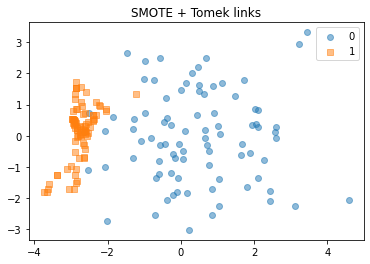

In [17]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(sampling_strategy='auto')
X_smt, y_smt = smt.fit_sample(X, y)

plot_2d_space(X_smt, y_smt, 'SMOTE + Tomek links')

#### Plus de liens

* Documentation imbalanced-learn :<br>
http://contrib.scikit-learn.org/imbalanced-learn/stable/index.html
* GitHub imbalanced-learn :<br>
https://github.com/scikit-learn-contrib/imbalanced-learn
* Comparaison de la combinaison des algorithmes de suréchantillonnage et de sous-échantillonnage:<br>
http://contrib.scikit-learn.org/imbalanced-learn/stable/auto_examples/combine/plot_comparison_combine.html
* Chawla, Nitesh V., et al. "SMOTE: synthetic minority over-sampling technique." Journal of artificial intelligence research 16 (2002):<br>
https://www.jair.org/media/953/live-953-2037-jair.pdf